## CSIS 3290 – 001 – Lab 01
### Name- Arpit Mohanani
### Student ID- 300337709


### Load the python library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seab

### Read the data

In [2]:
df = pd.read_csv('carsDataSample1K.csv') #reads the csv file

In [3]:
df.head()

,price,price2,miles,fuel type,exterior color,interior color,drivetrain,transmission,engine,VIN,name,seller_address,id,model_name
0,"$27,116",NaN,186 miles,Gasoline,Shadow Black,NaN,RWD,10-Speed Automatic,2.3L I4 16V GDI DOHC Turbo,1FATP8UH5J5184692,New 2018 Ford Mustang EcoBoost,"12836 Hwy 21, De Soto, MO 63020",745411027.0,Mustang
1,"$15,999",NaN,"48,054 miles",Gasoline,Ruby Red Metallic Tinted Clearcoat,Charcoal Black,RWD,6-Speed Manual,3.7L V6 24V MPFI DOHC,1ZVBP8AM5E5271728,Certified 2014 Ford Mustang V6 Premium,"2500 Wildcat Dr, Lincoln, NE 68521",756325094.0,Mustang
2,"$31,795",NaN,"29,050 miles",Gasoline,Glacier White,Gray,RWD,5-Speed Automatic,V6,1N6BF0LY1HN807941,New 2017 Nissan SV,"1025 SE Oldham Pkwy, Lee's Summit, MO 64081",722483803.0,Model Unknown
3,"$13,998",NaN,7 miles,Gasoline,Ingot Silver,Charcoal Black,FWD,6-Speed Automatic with Auto-Shift,1.6L I4 16V MPFI DOHC,3FADP4BJ6JM146711,New 2018 Ford Fiesta SE,"807 Southwest Blvd, Jefferson City, MO 65109",751728118.0,Fiesta
4,"$31,705",NaN,NaN,Gasoline,Shadow Black,Ebony,RWD,10-Speed Automatic,2.3L I4 16V GDI DOHC Turbo,1FA6P8TH0K5134654,New 2019 Ford Mustang,"255 John Deere Dr, Moscow Mills, MO 63362",751763029.0,Mustang


In [4]:
df.isnull().sum() #displays number of nulls values in each column

price             121
price2            590
miles             220
fuel type          39
exterior color     51
interior color    158
drivetrain         99
transmission       70
engine             83
VIN                41
name               41
seller_address     43
id                 38
model_name         38
dtype: int64

### Dropping and Filling data

In [5]:
df2 = df #keeping a copy of original dataset
df.dropna(how='all',inplace=True) #drops all rows in which all values are Null
df.isnull().sum()

price              90
price2            559
miles             189
fuel type           8
exterior color     20
interior color    127
drivetrain         68
transmission       39
engine             52
VIN                10
name               10
seller_address     12
id                  7
model_name          7
dtype: int64

In [6]:
df.price.fillna(df.price2, inplace=True)

In [7]:
df.isnull().sum()

price              19
price2            559
miles             189
fuel type           8
exterior color     20
interior color    127
drivetrain         68
transmission       39
engine             52
VIN                10
name               10
seller_address     12
id                  7
model_name          7
dtype: int64

In [8]:
df.drop("price2",axis="columns",inplace=True)

In [9]:
df.dropna(axis=0,how='any',inplace=True) #drops all rows having any null value

In [10]:
df.drop(['VIN','name','seller_address','id'],axis="columns",inplace=True)

In [11]:
df.head()

,price,miles,fuel type,exterior color,interior color,drivetrain,transmission,engine,model_name
1,"$15,999","48,054 miles",Gasoline,Ruby Red Metallic Tinted Clearcoat,Charcoal Black,RWD,6-Speed Manual,3.7L V6 24V MPFI DOHC,Mustang
2,"$31,795","29,050 miles",Gasoline,Glacier White,Gray,RWD,5-Speed Automatic,V6,Model Unknown
3,"$13,998",7 miles,Gasoline,Ingot Silver,Charcoal Black,FWD,6-Speed Automatic with Auto-Shift,1.6L I4 16V MPFI DOHC,Fiesta
5,"$19,237",10 miles,Gasoline,Oxford White,Ebony,FWD,6-Speed Automatic,1.5L I4 16V GDI DOHC Turbo,Fusion
6,"$38,868",3 miles,Gasoline,Oxford White,Charcoal,Rear Wheel Drive,Automatic,3.5L V6 Turbocharged,Transit-350


### Changing Columns Label

In [12]:
df.rename(columns={'fuel type': 'fuel_type'}, inplace=True)

In [13]:
df.rename(columns={'exterior color': 'exterior_color'}, inplace=True)

In [14]:
df.rename(columns={'interior color': 'interior_color'}, inplace=True)

In [15]:
df.head()

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,model_name
1,"$15,999","48,054 miles",Gasoline,Ruby Red Metallic Tinted Clearcoat,Charcoal Black,RWD,6-Speed Manual,3.7L V6 24V MPFI DOHC,Mustang
2,"$31,795","29,050 miles",Gasoline,Glacier White,Gray,RWD,5-Speed Automatic,V6,Model Unknown
3,"$13,998",7 miles,Gasoline,Ingot Silver,Charcoal Black,FWD,6-Speed Automatic with Auto-Shift,1.6L I4 16V MPFI DOHC,Fiesta
5,"$19,237",10 miles,Gasoline,Oxford White,Ebony,FWD,6-Speed Automatic,1.5L I4 16V GDI DOHC Turbo,Fusion
6,"$38,868",3 miles,Gasoline,Oxford White,Charcoal,Rear Wheel Drive,Automatic,3.5L V6 Turbocharged,Transit-350


### Reduce the number of unique values in the transmission and engine columns

In [16]:
df['transmission'].unique() #displays allunique values in Transmission column

array([' 6-Speed Manual', ' 5-Speed Automatic',
       ' 6-Speed Automatic with Auto-Shift', ' 6-Speed Automatic',
       ' Automatic', ' eCVT', ' 6-Speed Automatic with Overdrive',
       ' 6-Speed Auto-Shift Manual w/OD', ' 8-Speed Automatic',
       ' 10-Speed Automatic', ' Automatic 6-Speed',
       ' 6-Speed Automatic w/OD', ' TorqShift 6-Speed Automatic',
       ' 6-Speed Automatic with Select-Shift', ' 10-Speed',
       ' 6-Speed Automatic with Powershift', ' Automatic CVT',
       ' 6-Speed Automatic Electronic', ' Manual 6-Speed',
       ' Shiftable Automatic', ' 4-Speed Automatic', ' 6-Speed A/T',
       ' 10-Speed Automatic w/OD', ' 6-Speed Manual w/OD',
       ' 5-Speed Manual with Overdrive', ' Automatic 4-Speed',
       ' 6-Speed Shiftable Automatic', ' 6-Speed PowerShift Automatic',
       ' AUTOMATIC', ' 6-SPD AUTO TRANS W/SLCTSHFT', ' Automatic 5-Speed',
       ' 8-Speed Automatic w/OD', ' Auto', ' 6 Speed Automatic',
       ' 5-Speed Manual', ' 6-Speed Automatic w/man

In [17]:
df.loc[df['transmission'].str.contains('(?i)CVT'), 'transmission'] = 'CVT'

In [18]:
df.loc[df['transmission'].str.contains('(?i)Auto'), 'transmission'] = 'Auto'

In [19]:
df.loc[df['transmission'].str.contains('(?i)Manual'), 'transmission'] = 'Manual'

In [20]:
df.head()

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,model_name
1,"$15,999","48,054 miles",Gasoline,Ruby Red Metallic Tinted Clearcoat,Charcoal Black,RWD,Manual,3.7L V6 24V MPFI DOHC,Mustang
2,"$31,795","29,050 miles",Gasoline,Glacier White,Gray,RWD,Auto,V6,Model Unknown
3,"$13,998",7 miles,Gasoline,Ingot Silver,Charcoal Black,FWD,Auto,1.6L I4 16V MPFI DOHC,Fiesta
5,"$19,237",10 miles,Gasoline,Oxford White,Ebony,FWD,Auto,1.5L I4 16V GDI DOHC Turbo,Fusion
6,"$38,868",3 miles,Gasoline,Oxford White,Charcoal,Rear Wheel Drive,Auto,3.5L V6 Turbocharged,Transit-350


In [21]:
df['transmission'].unique()

array(['Manual', 'Auto', 'CVT', ' 10-Speed', ' 6-Speed A/T',
       ' Not Specified', ' 6-SPD SELECT SHIFT',
       ' 1-Speed Continuously Variable Ratio', ' Dual Shift Gearbox'],
      dtype=object)

In [22]:
df.transmission.value_counts()

Auto                                    645
Manual                                   27
CVT                                      16
 10-Speed                                14
 6-Speed A/T                              8
 6-SPD SELECT SHIFT                       1
 1-Speed Continuously Variable Ratio      1
 Not Specified                            1
 Dual Shift Gearbox                       1
Name: transmission, dtype: int64

In [23]:
df.drop(df.loc[df.transmission.str.contains('(?i)speed')].index, inplace=True)

In [24]:
df.drop(df.loc[df.transmission.str.contains('(?i)not specified')].index, inplace=True)

In [25]:
df.drop(df.loc[df.transmission.str.contains('(?i)shift')].index, inplace=True)

In [26]:
df.transmission.value_counts()

Auto      645
Manual     27
CVT        16
Name: transmission, dtype: int64

In [27]:
df.engine.unique()

array([' 3.7L V6 24V MPFI DOHC', ' V6', ' 1.6L I4 16V MPFI DOHC',
       ' 1.5L I4 16V GDI DOHC Turbo', ' 3.5L V6 Turbocharged', ' 5.3L',
       ' 2.0L', ' I4',
       ' EcoBoost 3.5L V6 GTDi DOHC 24V Twin Turbocharged', ' V-6 3.7L',
       ' 3.5L V6 24V GDI DOHC Twin Turbo',
       ' Regular Unleaded I-4 2.0 L/122', ' 2.0L I4 16V GDI DOHC Turbo',
       ' 6.7L V8 32V DDI OHV Turbo Diesel', ' 3.0L V6',
       ' 6.2L V8 16V MPFI SOHC Flexible Fuel',
       ' 3.5L V6 Twin Turbocharger',
       ' 2.0L I4 16V GDI DOHC Flexible Fuel',
       ' Regular Unleaded V-6 3.7 L/228',
       ' 6.7L POWERSTROKE TURBODIESEL V8', ' 3.5L V6 24V MPFI DOHC', '4',
       ' 3.5L V6 Ti-VCT', ' Regular Unleaded V-6 3.3 L',
       ' 5.0L V8 32V MPFI DOHC', ' 6.7L Turbocharged', ' 6 Cylinder',
       ' EcoBoost 2.7L V6 GTDi DOHC 24V Twin Turbocharged',
       ' 2.0L 4 cyls', ' 1.5L I4 16V GDI DOHC Turbo Flexible Fuel',
       ' 2.3L I4 16V GDI DOHC Turbo', ' 2.0L I4 16V MPFI DOHC Hybrid',
       ' 3.5 L', ' 4 C

In [28]:
df.loc[df['engine'].str.contains('(?i)v-2|v2|I2|I-2|2 cyl|2-cyl|2.'), 'engine'] = 'V2'

In [29]:
df.loc[df['engine'].str.contains('(?i)v-3|v3|I3|I-3|3 cyl|3-cyl|3.'), 'engine'] = 'V3'

In [30]:
df.loc[df['engine'].str.contains('(?i)v-4|v4|I4|I-4|4 cyl|4-cyl|4.'), 'engine'] = 'V4'

In [31]:
df.loc[df['engine'].str.contains('(?i)v-5|v5|I5|I-5|5 cyl|5-cyl|5.'), 'engine'] = 'V5'

In [32]:
df.loc[df['engine'].str.contains('(?i)v-6|v6|I6|I-6|6 cyl|6-cyl|6.'), 'engine'] = 'V6'

In [33]:
df.loc[df['engine'].str.contains('(?i)v-8|v8|I8|I-8|8 cyl|8-cyl|8.'), 'engine'] = 'V8'

In [34]:
df.engine.unique()

array(['V2', 'V6', 'V4', 'V3', '4', 'V5', '8', 'V8', '6'], dtype=object)

In [35]:
df.loc[df['engine'].str.contains('4'), 'engine'] = 'V4'

In [36]:
df.loc[df['engine'].str.contains('6'), 'engine'] = 'V6'

In [37]:
df.loc[df['engine'].str.contains('8'), 'engine'] = 'V8'

In [38]:
df.engine.unique()

array(['V2', 'V6', 'V4', 'V3', 'V5', 'V8'], dtype=object)

In [39]:
df.reset_index(inplace=True, drop=True) #resets the index of the data file

In [40]:
df.head(7)

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,model_name
0,"$15,999","48,054 miles",Gasoline,Ruby Red Metallic Tinted Clearcoat,Charcoal Black,RWD,Manual,V2,Mustang
1,"$31,795","29,050 miles",Gasoline,Glacier White,Gray,RWD,Auto,V6,Model Unknown
2,"$13,998",7 miles,Gasoline,Ingot Silver,Charcoal Black,FWD,Auto,V4,Fiesta
3,"$19,237",10 miles,Gasoline,Oxford White,Ebony,FWD,Auto,V4,Fusion
4,"$38,868",3 miles,Gasoline,Oxford White,Charcoal,Rear Wheel Drive,Auto,V3,Transit-350
5,"$12,997","132,434 miles",Gasoline,Silver Birch Metallic,Gray,AWD,Auto,V3,Model Unknown
6,"$19,431",12 miles,Gasoline,Diamond White - White,Medium Stone Cloth,Four Wheel Drive,Auto,V2,EcoSport


### Fix the format of column miles and price

In [41]:
df['miles'] = df['miles'].str.replace(',', '')
df['miles'] = df['miles'].str.replace(' miles', '')

In [42]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')

In [43]:
df.dtypes # displays the datatype of all columns

price             object
miles             object
fuel_type         object
exterior_color    object
interior_color    object
drivetrain        object
transmission      object
engine            object
model_name        object
dtype: object

In [44]:
df["price"] = pd.to_numeric(df["price"])
df["miles"] = pd.to_numeric(df["miles"])

### Save the Cleaned Dataset

In [45]:
df.to_csv('Lab01_AMo37709.csv',index=False) #saves the cleaned dataset

### Analyze the Statistics

In [46]:
df.head()

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,model_name
0,15999,48054,Gasoline,Ruby Red Metallic Tinted Clearcoat,Charcoal Black,RWD,Manual,V2,Mustang
1,31795,29050,Gasoline,Glacier White,Gray,RWD,Auto,V6,Model Unknown
2,13998,7,Gasoline,Ingot Silver,Charcoal Black,FWD,Auto,V4,Fiesta
3,19237,10,Gasoline,Oxford White,Ebony,FWD,Auto,V4,Fusion
4,38868,3,Gasoline,Oxford White,Charcoal,Rear Wheel Drive,Auto,V3,Transit-350


In [47]:
df.describe() #displays statistics of theh data

,price,miles
count,688.000000,688.000000
mean,29012.081395,24578.636628
std,15421.825892,40091.394808
min,1595.000000,1.000000
25%,17292.000000,5.000000
50%,26040.000000,52.000000
75%,37529.500000,35488.250000
max,83060.000000,215407.000000


In [48]:
df.cov() #displays covariance of integer columns

,price,miles
price,2.378327e+08,-2.939074e+08
miles,-2.939074e+08,1.607320e+09


In [49]:
df.corr() #displays correlation of integer columns

,price,miles
price,1.000000,-0.475361
miles,-0.475361,1.000000


### Data visualization

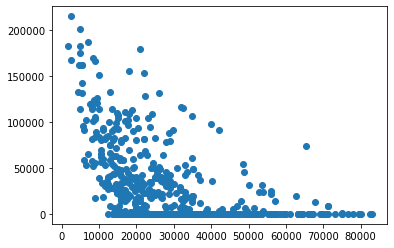

In [50]:
plt.scatter(df.price, df.miles)

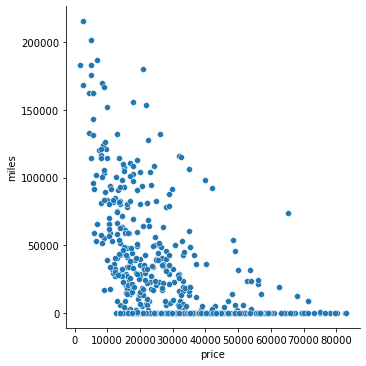

In [51]:
seab.relplot(data=df, x="price", y="miles", kind='scatter')